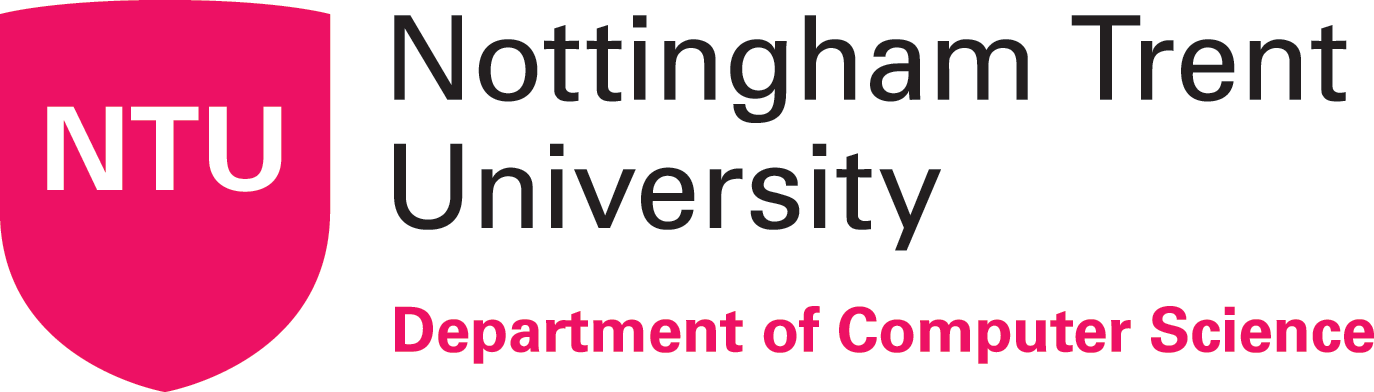

# SOFT40161 - Introduction to Computer Programming
# Submission of the Coursework

## Name: Ruth Amey
## NTU ID: N1019812 

<font  color= 'red'> **The Full description of the Coursework is here -** </font>

<a href="https://now.ntu.ac.uk/d2l/le/content/1037562/viewContent/13280440/View">SOFT40161-Coursework (Click here)</a>

At least 3-4 things for each part showing skills basically

dataset = https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric?select=METABRIC_RNA_Mutation.csv

# 

Github Link: <a href="https://github.com/Ruthamey1/CP_COURSEWORK">(Click here)</a>

The dataset used is found from kaggle (Alharbi, R. (2018)) it contains data on women who have had breast cancer. This data includes clinical features such as type of breast cancer, which breast, amount of months, survival and also genetic features such as gene expressions. 

# Section 1: Control Structures (16 marks)


In [393]:
#Importing necessary modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub

In [394]:
# Explanation and Documentation 

This is a binar classification problem where i will be investigating whether the patient survives (1) or not (0).

In [395]:
#Import data from kaggle

path = kagglehub.dataset_download("raghadalharbi/breast-cancer-gene-expression-profiles-metabric")

print("Path to dataset files:", path)

Path to dataset files: /Users/ruthamey/.cache/kagglehub/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric/versions/1


In [396]:
#Reading csv file
data = pd.read_csv(f'{path}/METABRIC_RNA_Mutation.csv')
data.head()

/var/folders/fy/p_zfmrqj0yn93nq3xwgxytjw0000gn/T/ipykernel_9568/4176210724.py:2: DtypeWarning:

Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.



,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [397]:
#Shape of the data
print(data.shape)

(1904, 693)


The shape of the data shows there are 1904 entries with 693 features, these features are a mix of clinical attributes which are the first 31 columns and genetic attributes being the other 662 columns I am only going to focus on the clinical attributes so first i will remove the genetic columns.

In [398]:
#Removing genetic features
clinical_attributes = data.iloc[:, 0:31]
clinical_attributes.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


This is still a lot of features to analyse so have decided to reduce to the features I deem most important.

In [399]:
#The different categories within cancer_type to see if a valuable feature to keep
clinical_attributes['cancer_type'].value_counts()

cancer_type
Breast Cancer     1903
Breast Sarcoma       1
Name: count, dtype: int64

In [400]:
#Index for the one entry Breast Sarcoma
for row in range(len(clinical_attributes)):
    if clinical_attributes.loc[row, 'cancer_type']=='Breast Sarcoma':
        print(row)

170


This is a feature I would of deemed important but as there is only one value for breast sarcoma I have decided to remove the value as there is not enough data to give us any information on breast sarcomas which is of value.

In [401]:
#Dropping Row
clinical_attributes = clinical_attributes.drop(170)
clinical_attributes = clinical_attributes.reset_index()

In [402]:
#Creating new dataframe which just conatins the features chosen to keep
features_to_keep = ['age_at_diagnosis', 'type_of_breast_surgery', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
                    'primary_tumor_laterality', 'lymph_nodes_examined_positive', 'overall_survival_months', 'overall_survival',
                    'tumor_size', 'tumor_stage']
data = pd.DataFrame()

for feature in features_to_keep:
    data[feature] = clinical_attributes.loc[:, feature]

data.head()

,age_at_diagnosis,type_of_breast_surgery,cancer_type_detailed,cellularity,chemotherapy,primary_tumor_laterality,lymph_nodes_examined_positive,overall_survival_months,overall_survival,tumor_size,tumor_stage
0,75.65,MASTECTOMY,Breast Invasive Ductal Carcinoma,NaN,0,Right,10.0,140.500000,1,22.0,2.0
1,43.19,BREAST CONSERVING,Breast Invasive Ductal Carcinoma,High,0,Right,0.0,84.633333,1,10.0,1.0
2,48.87,MASTECTOMY,Breast Invasive Ductal Carcinoma,High,1,Right,1.0,163.700000,0,15.0,2.0
3,47.68,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,Right,3.0,164.933333,1,25.0,2.0
4,76.97,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,High,1,Right,8.0,41.366667,0,40.0,2.0


In [403]:
#Basic Statistics of each numerical features
data.describe()

,age_at_diagnosis,chemotherapy,lymph_nodes_examined_positive,overall_survival_months,overall_survival,tumor_size,tumor_stage
count,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1884.000000,1403.000000
mean,61.092133,0.208092,2.003153,125.187073,0.420389,26.238726,1.750535
std,12.980229,0.406050,4.080807,76.300265,0.493751,15.160976,0.628999
min,21.930000,0.000000,0.000000,0.100000,0.000000,1.000000,0.000000
25%,51.370000,0.000000,0.000000,60.883333,0.000000,17.000000,1.000000
50%,61.780000,0.000000,0.000000,115.633333,0.000000,23.000000,2.000000
75%,70.595000,0.000000,2.000000,184.733333,1.000000,30.000000,2.000000
max,96.290000,1.000000,45.000000,355.200000,1.000000,182.000000,4.000000


The tumor size can be categorized into 3 sizes - Small, Medium, Large (Susan G. Komen®. (2024))

In [404]:
#Creating new feature
for row in range(len(data)):
    if data.loc[row, 'tumor_size'] < 20:
        data.loc[row, 'tumor_size_category'] = 'Small'
    elif data.loc[row, 'tumor_size'] >= 20 and data.loc[row, 'tumor_size'] < 50:
        data.loc[row, 'tumor_size_category'] = 'Medium' 
    elif data.loc[row, 'tumor_size'] >= 50:
        data.loc[row, 'tumor_size_category'] = 'Large'
    else:
        data.loc[row, 'tumor_size_category'] = np.nan

In [405]:
#Observing how many entries for each category
data['tumor_size_category'].value_counts()

tumor_size_category
Medium    1150
Small      592
Large      142
Name: count, dtype: int64

In [406]:
#categorical features
categorical = data.select_dtypes(include=[object])
#Numerical features
numerical = data.select_dtypes(exclude=object)

#Showing the categories for each categorical feature
for category in categorical:
    print(data[category].value_counts())
    print()

type_of_breast_surgery
MASTECTOMY           1127
BREAST CONSERVING     755
Name: count, dtype: int64

cancer_type_detailed
Breast Invasive Ductal Carcinoma             1499
Breast Mixed Ductal and Lobular Carcinoma     207
Breast Invasive Lobular Carcinoma             142
Breast Invasive Mixed Mucinous Carcinoma       22
Breast                                         17
Metaplastic Breast Cancer                       1
Name: count, dtype: int64

cellularity
High        939
Moderate    710
Low         200
Name: count, dtype: int64

primary_tumor_laterality
Left     935
Right    863
Name: count, dtype: int64

tumor_size_category
Medium    1150
Small      592
Large      142
Name: count, dtype: int64



In [407]:
# Reflection on results 

# Section 2: Functions and Modules (16 marks)  

In [408]:
# Explanation and Documentation 

In [409]:
data['tumor_size']

0       22.0
1       10.0
2       15.0
3       25.0
4       40.0
        ... 
1898    25.0
1899    20.0
1900    25.0
1901    25.0
1902    20.0
Name: tumor_size, Length: 1903, dtype: float64

In [410]:
#Function showing the mean survival for the categories from the inputted feature
def mean_survival(feature):
    try:
        for cat in categorical:
            if feature in cat:
                raise ValueError
        mean = data.groupby('overall_survival')[feature].mean()
        print(f'The mean survival for {feature} is:')
        print(mean)
    except ValueError:
        print('Enter a numerical feature')

#Using the fucntion to find mean tumor size of survival
mean_survival('tumor_size')

Enter a numerical feature


In [411]:
#Using the fucntion to find mean age of survival
mean_survival('age_at_diagnosis')

The mean survival for age_at_diagnosis is:
overall_survival
0    64.444751
1    56.469712
Name: age_at_diagnosis, dtype: float64


In [412]:
#Testing a categorical feature
mean_survival('cellularity')

Enter a numerical feature


When inputting the size of the tumor it shows that the mean size where the patient dies is 28.4, whereas, patients that tend to survive have a smaller tumor of size 23.3. This function can be used for any numerical feature, if a categorical feature is entered it will respond with a value error. This function is useful as can easily see if a feature has an affect on survival, for example when inputting age, can see that the means show that an older age of 64.4 is more likely to not survive that a younger women of age 56.5.

In [413]:
import numpy as np

#Function helping to see if there is a correlation between two numerical features
def correlation(feature1, feature2):
    try:
        cor = np.corrcoef(data[feature1].values, data[feature2].values)[0,1]
        print(f'The correlation between {feature1} and {feature2} is {cor:.3f}')
    except ValueError:
        print('Enter numerical features')
    if cor >= 0.5 or cor <= -0.5:
        print('Features show a correlation')
        print('Further investigation is needed')

In [414]:
#Using the function to see correlation between two features
correlation('age_at_diagnosis', 'lymph_nodes_examined_positive')

The correlation between age_at_diagnosis and lymph_nodes_examined_positive is -0.007


This is a very low correlation so tells us the two features present different information. This is a useful function as if two features have a high correlation (where output is close to 1 or -1) then both features aren't needed as no new inforation is being given by keeping both.

A one sample t-test is a statistical method which can be used to see if the mean of a single sample is significantly different to the population mean. This is useful as it can help determine whether differences have occured by chance or reflect a true difference. For example if the population mean age for breast cancer in the USA is 55, where this data is collected in the UK we can determine if there is a true difference between the two countries. After testing (shown below), the null hypothesis can be rejected, due to the p-value being less than 0.05, concluding the mean is significantly different in the UK with a confidence interval of the true mean being between 60.51 and 61.68.

In [415]:
#Importing stats function
import scipy.stats as stats

#One sample t-test function
def one_sample_ttest(feature1, population_mean):
    stat = stats.ttest_1samp(data[feature1], population_mean)
    ci = stat.confidence_interval(confidence_level=0.95)
    print(f'The T-stat is {stat.statistic:.2f} with p value {stat.pvalue:.2f}')
    print(f'The confidence interval is between {ci.low:.2f} and {ci.high:.2f}')

#One sample t-test for age
one_sample_ttest('age_at_diagnosis', 55)

The T-stat is 20.47 with p value 0.00
The confidence interval is between 60.51 and 61.68


In [416]:
#Turning categorical variables which have order into numerical
from sklearn.preprocessing import OrdinalEncoder

def ordinal(data, feature, *args):
    model = OrdinalEncoder(categories = [list(args)])
    data[feature]= model.fit_transform(data[[feature]])

In [417]:
#Turning tumor size category and cellularity into ordinal numerical values
ordinal(data, 'tumor_size_category', 'Small', 'Medium', 'Large', np.nan)
ordinal(data, 'cellularity', 'Low', 'Moderate', 'High', np.nan)

This has sorted the categories with order. The other categorical variables can then be sorted after missing values have been filled in.

In [418]:
# Reflection on results 

# Section 3: Data Handling with Pandas (16 marks)  

In [419]:
# Explanation and Documentation 

First will look to see if there is any duplicates, patient id has already been dropped so each row should contain something different. As seen no duplicates are present. 

In [420]:
#See if any data is duplicated
print(data.duplicated().sum())

0


In [421]:
#See if any data is missing
data.isna().sum()

age_at_diagnosis                   0
type_of_breast_surgery            21
cancer_type_detailed              15
cellularity                       54
chemotherapy                       0
primary_tumor_laterality         105
lymph_nodes_examined_positive      0
overall_survival_months            0
overall_survival                   0
tumor_size                        19
tumor_stage                      500
tumor_size_category               19
dtype: int64

As the categorical features are only missing a few values I have decided it is best to fill these in with the most common category (mode) within that column so information is not lost from dropping the rows.

In [422]:
for feature in categorical:
    data[feature] = data[feature].fillna(data[feature].mode()[0])

In [423]:
data.isna().sum()

age_at_diagnosis                   0
type_of_breast_surgery             0
cancer_type_detailed               0
cellularity                        0
chemotherapy                       0
primary_tumor_laterality           0
lymph_nodes_examined_positive      0
overall_survival_months            0
overall_survival                   0
tumor_size                        19
tumor_stage                      500
tumor_size_category                0
dtype: int64

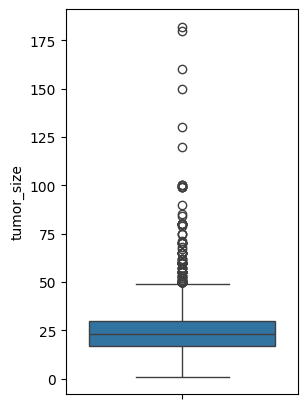

In [424]:
plt.figure(figsize=(3,5))

sns.boxplot(data=data, y='tumor_size')

plt.show()

As there are a lot of outliers I have decided to fill in the missing values for tumour size with the median.
For tumor stage there a lot of values missing, with what stage cancer you have being a huge factor into survival rates I do not want to fill this with the mean or median distorting the results. Therefore although it is losing data the data is large enough to still have a good proportion of information so have deciding to drop the column.

In [425]:
#Filling tumor size with median
data['tumor_size'] = data['tumor_size'].fillna(data['tumor_size'].median())

In [426]:
#Dropping tumor stage
data = data.dropna()
#Resetting index
data = data.reset_index(drop=True)

In [428]:
categorical['cancer_type_detailed'].value_counts()

cancer_type_detailed
Breast Invasive Ductal Carcinoma             1499
Breast Mixed Ductal and Lobular Carcinoma     207
Breast Invasive Lobular Carcinoma             142
Breast Invasive Mixed Mucinous Carcinoma       22
Breast                                         17
Metaplastic Breast Cancer                       1
Name: count, dtype: int64

Breast isn't a type of cancer so have replaced these values with the mode of cancer type

In [429]:
miscategorised = []

mode = data['cancer_type_detailed'].mode()[0]

#Appending the index of rows conatining category Breast into a list
for row in range(len(categorical)):
    if categorical.loc[row, 'cancer_type_detailed']=='Breast':
        miscategorised.append(row)

#Replacing breast with the mode
for value in miscategorised:
    data.loc[value, 'cancer_type_detailed'] = mode

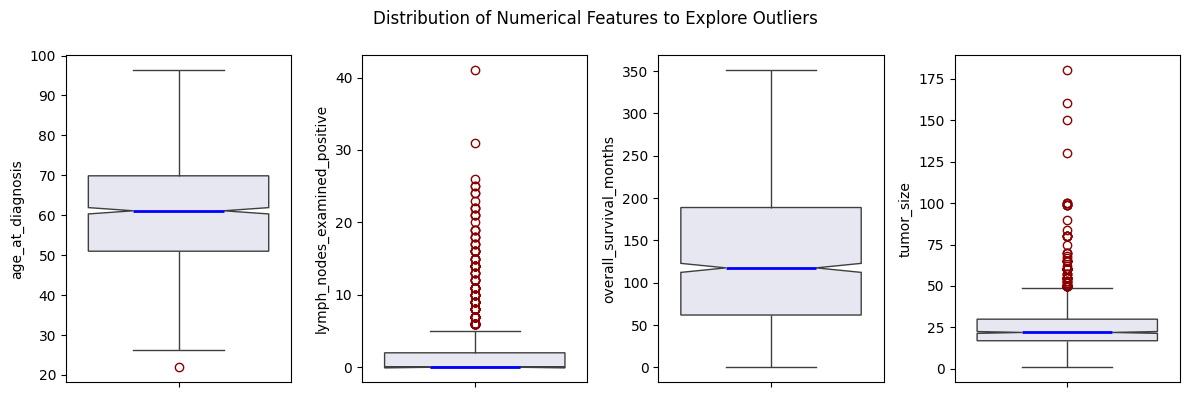

In [430]:
numerical = ['age_at_diagnosis', 'lymph_nodes_examined_positive', 'overall_survival_months', 'tumor_size']
#Visualising boxplots to detect outliers
Fig, axes = plt.subplots(1,4,figsize=(12,4)) 

for index, i in enumerate(numerical):
        sns.boxplot(data=data,
                    y=i, 
                    ax=axes[index], 
                    flierprops=dict(markeredgecolor='darkred'),
                    notch=True, 
                    boxprops={'facecolor':(.1,.1,.5,.1)},
                    medianprops={'color':'b', 'linewidth':2})

plt.suptitle('Distribution of Numerical Features to Explore Outliers')
plt.tight_layout()
plt.show()

When inspecting outliers, it is importnt to consider that some cases are rare, and do not what to lose information which holds value. Firstly with age there seems to be one data point which is someone who is aged 21, this is a rare case however not far away from the lower quartile range so do not want to remove. 
Chemo is two categories with the lesser having chemo this is important so do not want to remove.
Lymphnodes, the boxplot has detected many outliers, however it is possible that some perople contain many posiive lymh nodes for this reason i do not want to lose this information or dilute by replacing with the mean or median as this will they mean these entries will have much lesser than what they have. For this reasonI want to generalise the data, and the highest ones replacing to 25c positive lymoh nodes. This stops from being ny much higher values, but keeps those entries as a high amount

https://pmc.ncbi.nlm.nih.gov/articles/PMC5010640/#:~:text=The%20median%20size%20of%20phyllodes,to%2048%20cm%20in%20diameter.
Tumors whcih are over 100mm are cinsidered rare tumours for the generilization of the data I have decided to remove anything over this size.
Tumor stage has said 4 is an outlier, this importsnt information to keep just means that there is not as many entries withi the data that have stage 4.

In [431]:
data.head()

,age_at_diagnosis,type_of_breast_surgery,cancer_type_detailed,cellularity,chemotherapy,primary_tumor_laterality,lymph_nodes_examined_positive,overall_survival_months,overall_survival,tumor_size,tumor_stage,tumor_size_category
0,75.65,MASTECTOMY,Breast Invasive Ductal Carcinoma,2.0,0.0,Right,10.0,140.500000,1.0,22.0,2.0,1.0
1,43.19,BREAST CONSERVING,Breast Invasive Ductal Carcinoma,2.0,0.0,Right,0.0,84.633333,1.0,10.0,1.0,0.0
2,48.87,MASTECTOMY,Breast Invasive Ductal Carcinoma,2.0,1.0,Right,1.0,163.700000,0.0,15.0,2.0,0.0
3,47.68,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,1.0,1.0,Right,3.0,164.933333,1.0,25.0,2.0,1.0
4,76.97,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,2.0,1.0,Right,8.0,41.366667,0.0,40.0,2.0,1.0


In [434]:
#Resetting index
data=data.reset_index(drop=True)

In [435]:
outliers = []
for row in range(len(data)):
    if data.loc[row, 'lymph_nodes_examined_positive'] > 30:
        outliers.append(row)
        
for outlier in outliers:
    data.loc[outlier, 'lymph_nodes_examined_positive'] = 25

In [436]:
tumor_size_and_stage = data[(data['tumor_stage']==4.0) & (data['tumor_size']>100)]
print(tumor_size_and_stage)

Empty DataFrame
Columns: [age_at_diagnosis, type_of_breast_surgery, cancer_type_detailed, cellularity, chemotherapy, primary_tumor_laterality, lymph_nodes_examined_positive, overall_survival_months, overall_survival, tumor_size, tumor_stage, tumor_size_category]
Index: []


Before removing tumors which were over the size of 100 wanted to investigate if this has a high correlation to tumor stage as seen none of these sized tumors are stage 4 so information will not be lost on stage 4 cancer. This also makes it likely these are outliers as tumors this large would suggest the cancer is at a higher level.

In [438]:
outliers = []
for row in range(len(data)):
    if data.loc[row, 'tumor_size'] > 100:
        outliers.append(row)
        
data = data.drop(outliers)

In [440]:
data=data.reset_index(drop=True)

In [442]:
outliers = []
for row in range(len(data)):
    if data.loc[row, 'tumor_stage'] == 0:
        outliers.append(row)
        
data = data.drop(outliers)
data=data.reset_index(drop=True)

In [259]:
# Reflection on results 

# Section 4: Data Visualization (16 marks)  

In [262]:
data.head()

,level_0,index,age_at_diagnosis,type_of_breast_surgery,cancer_type_detailed,cellularity,chemotherapy,primary_tumor_laterality,lymph_nodes_examined_positive,overall_survival_months,overall_survival,tumor_size,tumor_stage,tumor_size_category
0,0,0.0,75.65,MASTECTOMY,Breast Invasive Ductal Carcinoma,2.0,0.0,Right,10.0,140.500000,1.0,22.0,2.0,1.0
1,1,1.0,43.19,BREAST CONSERVING,Breast Invasive Ductal Carcinoma,2.0,0.0,Right,0.0,84.633333,1.0,10.0,1.0,0.0
2,2,2.0,48.87,MASTECTOMY,Breast Invasive Ductal Carcinoma,2.0,1.0,Right,1.0,163.700000,0.0,15.0,2.0,0.0
3,3,3.0,47.68,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,1.0,1.0,Right,3.0,164.933333,1.0,25.0,2.0,1.0
4,4,4.0,76.97,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,2.0,1.0,Right,8.0,41.366667,0.0,40.0,2.0,1.0


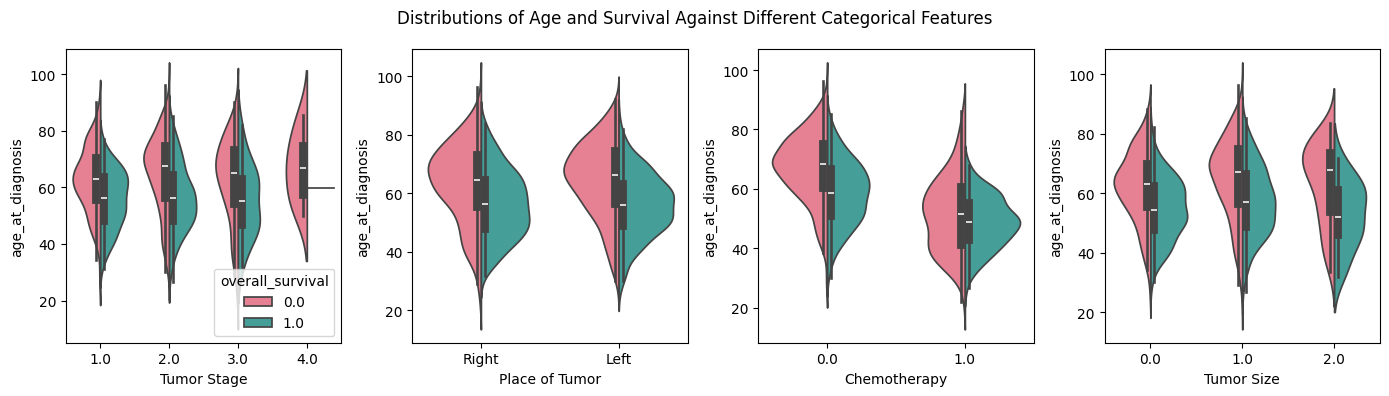

In [443]:
Fig, axes = plt.subplots(1,4,figsize=(14,4)) 

sns.violinplot(x='tumor_stage', y='age_at_diagnosis', data=data, hue='overall_survival', 
               split=True, palette='husl', ax = axes[0])
sns.violinplot(x='primary_tumor_laterality', y='age_at_diagnosis', data=data, hue='overall_survival',
               split=True, palette='husl', ax = axes[1], legend=False)
sns.violinplot(x='chemotherapy', y='age_at_diagnosis', data=data, hue='overall_survival', 
               split=True, palette='husl', ax = axes[2], legend=False)
sns.violinplot(x='tumor_size_category', y='age_at_diagnosis', data=data, hue='overall_survival',
               split=True, palette='husl', ax = axes[3], legend=False)

axes[0].set_xlabel('Tumor Stage')
axes[1].set_xlabel('Place of Tumor')
axes[2].set_xlabel('Chemotherapy')
axes[3].set_xlabel('Tumor Size')
plt.suptitle('Distributions of Age and Survival Against Different Categorical Features')
plt.tight_layout()
plt.show()

<Figure size 1200x1200 with 0 Axes>

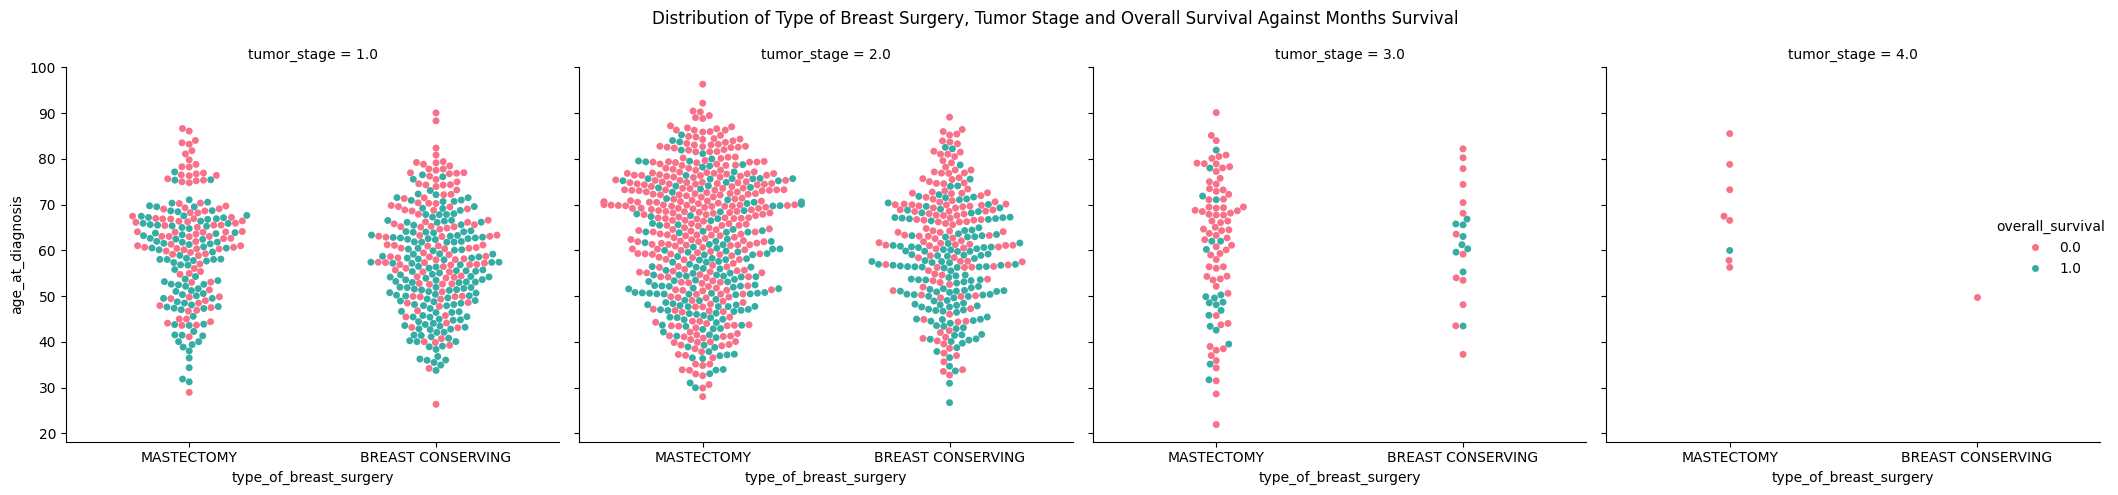

In [451]:
plt.figure(figsize=(12,12))
sns.catplot(data=data, kind='swarm', x='type_of_breast_surgery', y='age_at_diagnosis',hue='overall_survival', col='tumor_stage', 
           palette='husl') 

plt.suptitle('Distribution of Type of Breast Surgery, Tumor Stage and Overall Survival Against Months Survival')
plt.tight_layout()
plt.show()

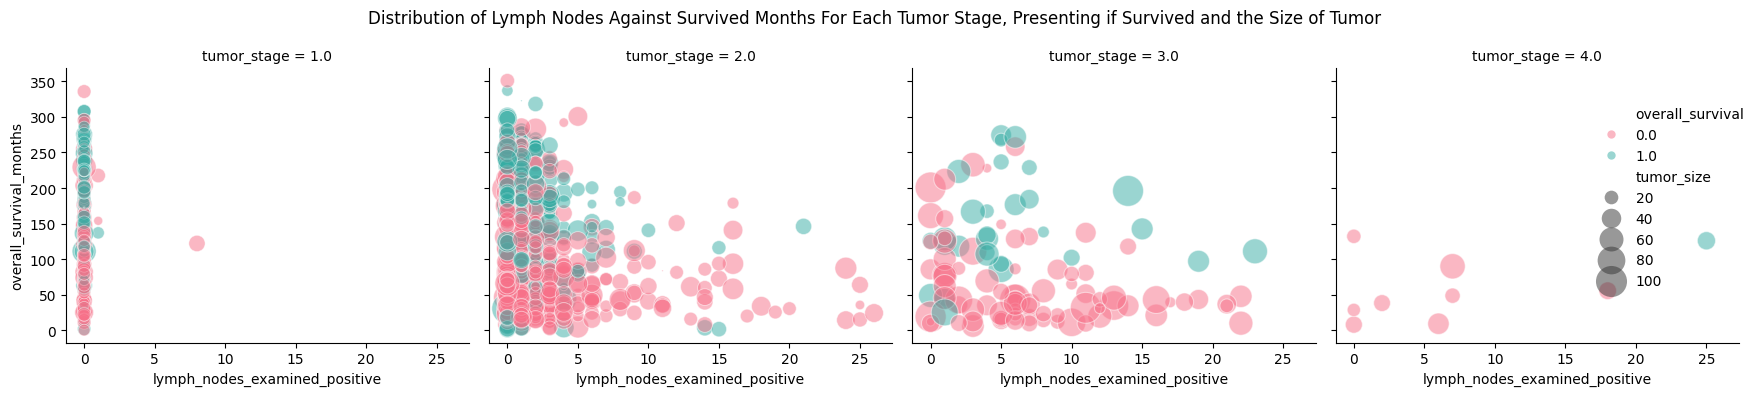

In [450]:
sns.relplot(x="lymph_nodes_examined_positive", y="overall_survival_months", hue="overall_survival", size="tumor_size", col='tumor_stage',
            sizes=(1, 500), alpha=.5, palette='husl',
            height=4, data=data)
plt.suptitle('Distribution of Lymph Nodes Against Survived Months For Each Tumor Stage, Presenting if Survived and the Size of Tumor')
plt.tight_layout()
plt.show()

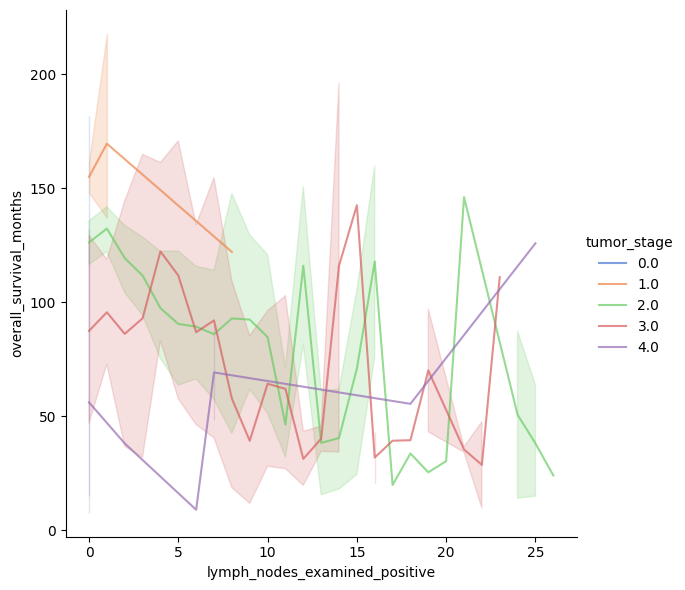

In [308]:
sns.relplot(x="lymph_nodes_examined_positive", y="overall_survival_months", hue="tumor_stage",
            sizes=(40, 400), alpha=.7, palette='muted',
            height=6, data=data, kind='line')

In [ ]:
# Reflection on results 

# Section 5: GUI Development (16 marks)  

In [ ]:
# Explanation and Documentation 

In [ ]:
# Reflection on results 

# Section 6: Conclusion: Version Control, Critical Appraisal, Documentation (20 marks)  

In [ ]:
# Explanation and Documentation 

# References:


*Alharbi, R. (2018). Breast Cancer Gene Expression Profiles (METABRIC). [online] Kaggle.com. Available at: https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric?select=METABRIC_RNA_Mutation.csv [Accessed 13 Dec. 2024].*

*Susan G. Komen®. (2024). Tumor Size Chart. [online] Available at: https://www.komen.org/breast-cancer/diagnosis/stages-staging/tumor-size/.*

*BMJ (2019). 7. The t tests | The BMJ. [online] Bmj.com. Available at: https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/7-t-tests.*

# Appendix:

(If any)